# Project Stage 2

## Task-3


> Create a team notebook to read in the COVID-19 data (cases, deaths, and population) using pandas and display the dataframe in a notebook.
> Merge all the three variables (cases, deaths, and population) to create a super COVID-19 datafame. Export it to a csv format.


In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Reading Confirmed, Death and Population data**

In [2]:
#reading confirmed covid cases file
confirmed_cases = pd.read_csv("../../data/covid_confirmed_usafacts.csv")

#reading confirmed dataset
deaths = pd.read_csv("../../data/covid_deaths_usafacts.csv")

#read population dataset
total_population = pd.read_csv("../../data/covid_county_population_usafacts.csv")

In [3]:
total_population.dtypes

countyFIPS      int64
County Name    object
State          object
population      int64
dtype: object

In [4]:
total_population['population'].sum()

328239523

In [5]:
total_population.head()

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


In [6]:
confirmed_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2022-02-08,2022-02-09,2022-02-10,2022-02-11,2022-02-12,2022-02-13,2022-02-14,2022-02-15,2022-02-16,2022-02-17
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,15089,15089,15155,15216,15216,15216,15325,15350,15366,15387
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,53992,53992,54203,54301,54301,54301,54481,54545,54614,54663
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,5372,5372,5391,5402,5402,5402,5411,5413,5413,5422
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,6244,6244,6283,6294,6294,6294,6317,6331,6336,6345


In [7]:
deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2022-02-08,2022-02-09,2022-02-10,2022-02-11,2022-02-12,2022-02-13,2022-02-14,2022-02-15,2022-02-16,2022-02-17
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,171,171,173,173,173,173,176,177,181,181
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,624,624,626,626,626,626,626,629,630,631
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,85,85,87,87,87,87,89,90,91,91
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,96,96,97,97,97,97,97,98,98,98


### Getting New daily cases

In [8]:
confirmed_cases = confirmed_cases[confirmed_cases['County Name']!='Statewide Unallocated']

In [9]:
deaths = deaths[deaths['County Name']!='Statewide Unallocated']

In [10]:
c = confirmed_cases.iloc[:,5:]
c.shape

(3142, 757)

In [11]:
new_cases = c.diff(axis=1)
new_cases

,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,...,2022-02-08,2022-02-09,2022-02-10,2022-02-11,2022-02-12,2022-02-13,2022-02-14,2022-02-15,2022-02-16,2022-02-17
1,NaN,0,0,0,0,0,0,0,0,0,...,43,0,66,61,0,0,109,25,16,21
2,NaN,0,0,0,0,0,0,0,0,0,...,224,0,211,98,0,0,180,64,69,49
3,NaN,0,0,0,0,0,0,0,0,0,...,16,0,19,11,0,0,9,2,0,9
4,NaN,0,0,0,0,0,0,0,0,0,...,20,0,39,11,0,0,23,14,5,9
5,NaN,0,0,0,0,0,0,0,0,0,...,51,0,76,23,0,0,48,11,19,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,NaN,0,0,0,0,0,0,0,0,0,...,30,0,0,132,0,0,50,34,0,0
3189,NaN,0,0,0,0,0,0,0,0,0,...,25,0,0,76,0,0,25,18,0,0
3190,NaN,0,0,0,0,0,0,0,0,0,...,16,0,0,30,0,0,6,9,0,0
3191,NaN,0,0,0,0,0,0,0,0,0,...,5,0,0,35,0,0,10,5,0,0


### Getting New daily deaths

In [12]:
d = deaths.iloc[:,5:]
d.shape

(3142, 757)

In [13]:
new_deaths = d.diff(axis=1)
new_deaths

,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,...,2022-02-08,2022-02-09,2022-02-10,2022-02-11,2022-02-12,2022-02-13,2022-02-14,2022-02-15,2022-02-16,2022-02-17
1,NaN,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,3,1,4,0
2,NaN,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,3,1,1
3,NaN,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,2,1,1,0
4,NaN,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,NaN,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
3189,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3190,NaN,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3191,NaN,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [14]:
usa_cases_total = c.iloc[:,:].sum().sum()
usa_cases_total


17901783910

# Member Task

In [15]:
nc_cases = confirmed_cases

**Converting data from wide to long format**

In [16]:
confirmed_cases= pd.melt(frame = confirmed_cases, id_vars=['countyFIPS','County Name','State','StateFIPS'], var_name= ['Date'], value_name= "Cases")

In [17]:
deaths = pd.melt(frame = deaths, id_vars=['countyFIPS','County Name','State','StateFIPS'], var_name= ['Date'], value_name= "Death")

**Merging confirmed cases and deaths data**

In [18]:
covid_combined_dataset = pd.merge(confirmed_cases,deaths,
        on = ['countyFIPS','County Name',"State",'StateFIPS',"Date"])

In [19]:
covid_combined_dataset = covid_combined_dataset[covid_combined_dataset['County Name'] != 'Statewide Unallocated']

In [20]:
covid_combined_dataset["Date"]= pd.to_datetime(covid_combined_dataset["Date"])

**Cleaning Population data before merging it with cases and deaths data**

In [21]:
total_population.drop('County Name',axis=1,inplace=True)
total_population.head()

,countyFIPS,State,population
0,0,AL,0
1,1001,AL,55869
2,1003,AL,223234
3,1005,AL,24686
4,1007,AL,22394


In [22]:
tp = total_population['population'].sum()

**Merging population data with cases and deaths data**

In [23]:
covid_combined_dataset = pd.merge(covid_combined_dataset, total_population)

In [24]:
covid_combined_dataset

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
0,1001,Autauga County,AL,1,2020-01-22,0,0,55869
1,1001,Autauga County,AL,1,2020-01-23,0,0,55869
2,1001,Autauga County,AL,1,2020-01-24,0,0,55869
3,1001,Autauga County,AL,1,2020-01-25,0,0,55869
4,1001,Autauga County,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
2381631,56045,Weston County,WY,56,2022-02-13,1524,17,6927
2381632,56045,Weston County,WY,56,2022-02-14,1524,17,6927
2381633,56045,Weston County,WY,56,2022-02-15,1528,17,6927
2381634,56045,Weston County,WY,56,2022-02-16,1528,17,6927


**The consolidated data file size is beyond 100MB and in order to handle it, we use parquet.
To work with *parquet*, we need to install *pyarrow***

In [14]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


**Converting the consolidated file to parquet format**

In [ ]:
covid_combined_dataset.to_parquet("../../data/covid_combined_dataset.parquet.gzip",compression='gzip')

**Reading from parquet**

In [16]:
pd.read_parquet("../../data/covid_combined_dataset.parquet.gzip")

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
0,1001,Autauga County,AL,1,2020-01-22,0,0,55869
1,1001,Autauga County,AL,1,2020-01-23,0,0,55869
2,1001,Autauga County,AL,1,2020-01-24,0,0,55869
3,1001,Autauga County,AL,1,2020-01-25,0,0,55869
4,1001,Autauga County,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
2381631,56045,Weston County,WY,56,2022-02-13,1524,17,6927
2381632,56045,Weston County,WY,56,2022-02-14,1524,17,6927
2381633,56045,Weston County,WY,56,2022-02-15,1528,17,6927
2381634,56045,Weston County,WY,56,2022-02-16,1528,17,6927


In [26]:
sup_data = covid_combined_dataset
sup_data.head()

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
0,1001,Autauga County,AL,1,2020-01-22,0,0,55869
1,1001,Autauga County,AL,1,2020-01-23,0,0,55869
2,1001,Autauga County,AL,1,2020-01-24,0,0,55869
3,1001,Autauga County,AL,1,2020-01-25,0,0,55869
4,1001,Autauga County,AL,1,2020-01-26,0,0,55869


In [27]:
sup_data = sup_data.sort_values('Date')
sup_data

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
0,1001,Autauga County,AL,1,2020-01-22,0,0,55869
1368190,35019,Guadalupe County,NM,35,2020-01-22,0,0,4300
1368948,35021,Harding County,NM,35,2020-01-22,0,0,625
1369706,35023,Hidalgo County,NM,35,2020-01-22,0,0,4198
2155752,51049,Cumberland County,VA,51,2020-01-22,0,0,9932
...,...,...,...,...,...,...,...,...
1582703,39089,Licking County,OH,39,2022-02-17,41113,443,176862
1581945,39087,Lawrence County,OH,39,2022-02-17,17344,210,59463
1581187,39085,Lake County,OH,39,2022-02-17,48408,694,230149
1579671,39081,Jefferson County,OH,39,2022-02-17,14473,288,65325


In [28]:
sup_data1 = sup_data.groupby('Date')['Cases'].sum()
sup_data1

Date
2020-01-22         723
2020-01-23         734
2020-01-24         741
2020-01-25         751
2020-01-26         759
                ...   
2022-02-13    75409177
2022-02-14    75585682
2022-02-15    75665834
2022-02-16    75808328
2022-02-17    75897987
Name: Cases, Length: 758, dtype: int64

In [648]:
nc_data = sup_data[sup_data['State']=='NC']
nc_data

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
1484922,37139,Pasquotank County,NC,37,2020-01-22,0,0,39824
1485680,37141,Pender County,NC,37,2020-01-22,0,0,63060
1486438,37143,Perquimans County,NC,37,2020-01-22,0,0,13463
1487196,37145,Person County,NC,37,2020-01-22,0,0,39490
1487954,37147,Pitt County,NC,37,2020-01-22,0,0,180742
...,...,...,...,...,...,...,...,...
1505387,37191,Wayne County,NC,37,2022-02-17,27305,372,123131
1508419,37199,Yancey County,NC,37,2022-02-17,4696,50,18069
1507661,37197,Yadkin County,NC,37,2022-02-17,10497,101,37667
1506903,37195,Wilson County,NC,37,2022-02-17,21010,292,81801


In [155]:
nc_pop = nc_data['population'].unique().sum()
nc_pop

10488084

In [414]:
nc_cases = nc_data.groupby('Date')['Cases'].sum()
nc_deaths = nc_data.groupby('Date')['Death'].sum()

In [415]:
nc_new_cases = nc_cases.diff()
nc_new_deaths = nc_deaths.diff()

In [416]:
type(nc_new_cases)

pandas.core.series.Series

In [417]:
nc_new_cases = nc_new_cases[1:]
nc_new_deaths = nc_new_deaths[1:]
nc_new_deaths

Date
2020-01-23      0.0
2020-01-24      0.0
2020-01-25      0.0
2020-01-26      0.0
2020-01-27      0.0
              ...  
2022-02-13      0.0
2022-02-14    116.0
2022-02-15     54.0
2022-02-16    133.0
2022-02-17     93.0
Name: Death, Length: 757, dtype: float64

In [418]:
nc_new_cases

Date
2020-01-23        0.0
2020-01-24        0.0
2020-01-25        0.0
2020-01-26        0.0
2020-01-27        0.0
               ...   
2022-02-13        0.0
2022-02-14    15025.0
2022-02-15     2920.0
2022-02-16     6084.0
2022-02-17     5623.0
Name: Cases, Length: 757, dtype: float64

In [419]:
nc_new_cases1 = []
for i in nc_new_cases:
    if i <= 0:
        nc_new_cases1.append(0)
    else:
        nc_new_cases1.append(i)
        
nc_new_cases1[:7]

[0, 0, 0, 0, 0, 0, 0]

In [420]:
nc_new_deaths1 = []
for i in nc_new_deaths:
    if i <= 0:
        nc_new_deaths1.append(0)
    else:
        nc_new_deaths1.append(i)
        
nc_new_deaths1[:5]

[0, 0, 0, 0, 0]

In [421]:
from statistics import mean,median,mode
avg_nc_new_cases = []
avg_nc_new_deaths = []

for i in range(0,nc_new_cases.shape[0],7):
    avg_nc_new_cases.append(round(mean(nc_new_cases1[i:i+7])))
for i in range(0,nc_new_deaths.shape[0],7):
    avg_nc_new_deaths.append(round(mean(nc_new_deaths1[i:i+7])))

med_nc_new_cases = []
med_nc_new_deaths = []

for i in range(0,nc_new_cases.shape[0],7):
    med_nc_new_cases.append(round(median(nc_new_cases1[i:i+7])))
for i in range(0,nc_new_deaths.shape[0],7):
    med_nc_new_deaths.append(round(median(nc_new_deaths1[i:i+7])))

mod_nc_new_cases = []
mod_nc_new_deaths = []

    
for i in range(0,nc_new_cases.shape[0],7):
    mod_nc_new_cases.append(round(mode(nc_new_cases1[i:i+7])))
for i in range(0,nc_new_deaths.shape[0],7):
    mod_nc_new_deaths.append(round(mode(nc_new_deaths1[i:i+7])))


In [422]:
nc_l = [] # NC list
for i in range(1,len(mod_nc_new_deaths)+1):
    nc_l.append(i)

In [423]:
nc_week = pd.DataFrame()
nc_week['week_count'] = nc_l
nc_week['mean_nc_new_cases'] = avg_nc_new_cases
nc_week['mean_nc_new_deaths'] = avg_nc_new_deaths
nc_week['median_nc_new_cases'] = med_nc_new_cases
nc_week['median_nc_new_deaths'] = med_nc_new_deaths
nc_week['mode_nc_new_cases'] = mod_nc_new_cases
nc_week['mode_nc_new_deaths'] = mod_nc_new_deaths
nc_week

,week_count,mean_nc_new_cases,mean_nc_new_deaths,median_nc_new_cases,median_nc_new_deaths,mode_nc_new_cases,mode_nc_new_deaths
0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0
2,3,0,0,0,0,0,0
3,4,0,0,0,0,0,0
4,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...
104,105,26218,58,18639,46,0,0
105,106,16865,66,12362,77,0,0
106,107,9546,83,10839,76,0,0
107,108,5763,69,6084,85,0,0


In [424]:
from statistics import mean,median,mode
print("The weekly mean cases in North Carolina is:", round(mean(avg_nc_new_cases)))
print("The weekly median cases in North Carolina is:", median(avg_nc_new_cases))
print("The weekly mode cases in North Carolina is:", mode(avg_nc_new_cases))

The weekly mean cases in North Carolina is: 3392
The weekly median cases in North Carolina is: 1858
The weekly mode cases in North Carolina is: 0


In [425]:
from statistics import mean,median,mode
print("The last 5 weeks mean cases in North Carolina is:", round(mean(avg_nc_new_deaths)))
print("The last 5 weeks median cases in North Carolina is:", median(avg_nc_new_deaths))
print("The last 5 weeks mode cases in North Carolina is:", mode(avg_nc_new_deaths))

The last 5 weeks mean cases in North Carolina is: 30
The last 5 weeks median cases in North Carolina is: 23
The last 5 weeks mode cases in North Carolina is: 0


### Other States

In [265]:
nm_data = sup_data[sup_data['State']=='NM']  #New Mexico
te_data = sup_data[sup_data['State']=='TN']  # Tennessee
va_data = sup_data[sup_data['State']=='VA']  # Virgina
oh_data = sup_data[sup_data['State']=='OH']  # Ohio
al_data = sup_data[sup_data['State']=='AL']  #Alabama

In [266]:
# New Mexico
nm_cases = nm_data.groupby('Date')['Cases'].sum()  
nm_deaths = nm_data.groupby('Date')['Death'].sum()
# Virginia
va_cases = va_data.groupby('Date')['Cases'].sum()
va_deaths = va_data.groupby('Date')['Death'].sum()
# Ohio
oh_cases = oh_data.groupby('Date')['Cases'].sum()
oh_deaths = oh_data.groupby('Date')['Death'].sum()


## New cases

In [267]:


nm_new_cases = nm_cases.diff()
nm_new_deaths = nm_deaths.diff()

va_new_cases = va_cases.diff()
va_new_deaths = va_deaths.diff()

oh_new_cases = oh_cases.diff()
oh_new_deaths = oh_deaths.diff()



In [268]:

nm_new_cases = nm_new_cases[1:]
nm_new_deaths = nm_new_deaths[1:]


va_new_cases = va_new_cases[1:]
va_new_deaths = va_new_deaths[1:]

oh_new_cases = oh_new_cases[1:]
oh_new_deaths = oh_new_deaths[1:]






In [269]:


nm_new_cases1 = [] # new mexico new cases filtering
for i in nm_new_cases:
    if i <= 0:
        nm_new_cases1.append(0)
    else:
        nm_new_cases1.append(i)
        
nm_new_cases1[:7]

va_new_cases1 = []  # virgina new cases filtering
for i in va_new_cases:
    if i <= 0:
        va_new_cases1.append(0)
    else:
        va_new_cases1.append(i)
        
va_new_cases1[:7]



oh_new_cases1 = []   # ohio new cases filtering
for i in oh_new_cases:
    if i <= 0:
        oh_new_cases1.append(0)
    else:
        oh_new_cases1.append(i)
        
oh_new_cases1[:7]






[0, 0, 0, 0, 0, 0, 0]

In [293]:


nm_new_deaths1 = [] # new mexico new deaths filtering
for i in nm_new_deaths:
    if i <= 0:
        nm_new_deaths1.append(0)
    else:
        nm_new_deaths1.append(i)
        
nm_new_deaths1[:7]


va_new_deaths1 = []  # virgina new deaths filtering
for i in va_new_deaths:
    if i <= 0:
        va_new_deaths1.append(0)
    else:
        va_new_deaths1.append(i)
        
oh_new_deaths1 = []   # ohio new deaths filtering
for i in oh_new_deaths:
    if i <= 0:
        oh_new_deaths1.append(0)
    else:
        oh_new_deaths1.append(i)
        
oh_new_deaths1[:7]

        

        


[0, 0, 0, 0, 0, 0, 0]

### Generating Weekly stats

In [291]:
from statistics import mean, median, mode

In [290]:
avg_nm_new_cases = []
avg_nm_new_deaths = []

for i in range(0,nm_new_cases.shape[0],7):
    avg_nm_new_cases.append(round(mean(nm_new_cases1[i:i+7])))
for i in range(0,nm_new_deaths.shape[0],7):
    avg_nm_new_deaths.append(round(mean(nm_new_deaths1[i:i+7])))
    

med_nm_new_cases = []
med_nm_new_deaths = []

for i in range(0,nm_new_cases.shape[0],7):
    med_nm_new_cases.append(round(median(nm_new_cases1[i:i+7])))
for i in range(0,nm_new_deaths.shape[0],7):
    med_nm_new_deaths.append(round(median(nm_new_deaths1[i:i+7])))
    

mod_nm_new_cases = []
mod_nm_new_deaths = []

    
for i in range(0,nm_new_cases.shape[0],7):
    mod_nm_new_cases.append(round(mode(nm_new_cases1[i:i+7])))
for i in range(0,nm_new_deaths.shape[0],7):
    mod_nm_new_deaths.append(round(mode(nm_new_deaths1[i:i+7])))



In [55]:
nm_week = pd.DataFrame()
nm_week['week_count'] = nc_l
nm_week['mean_nm_new_cases'] = avg_nc_new_cases
nm_week['mean_nm_new_deaths'] = avg_nc_new_deaths
nm_week['median_nm_new_cases'] = med_nc_new_cases
nm_week['median_nm_new_deaths'] = med_nc_new_deaths
nm_week['mode_nm_new_cases'] = mod_nc_new_cases
nm_week['mode_nm_new_deaths'] = mod_nc_new_deaths
nm_week

,week_count,mean_nm_new_cases,mean_nm_new_deaths,median_nm_new_cases,median_nm_new_deaths,mode_nm_new_cases,mode_nm_new_deaths
0,1,8,0,8,0,10,0
1,2,9,0,7,0,7,0
2,3,10,0,7,0,4,0
3,4,9,0,10,0,10,0
4,5,22,0,20,0,11,0
...,...,...,...,...,...,...,...
104,105,567774,2284,546745,2444,546745,2029
105,106,360100,2291,364898,2675,465485,2694
106,107,216005,2309,246308,2692,279267,2122
107,108,133923,1996,142494,2345,155393,2345


In [56]:
avg_va_new_cases = []
avg_va_new_deaths = []

for i in range(0,va_new_cases.shape[0],7):
    avg_va_new_cases.append(round(mean(va_new_cases1[i:i+7])))
for i in range(0,va_new_deaths.shape[0],7):
    avg_va_new_deaths.append(round(mean(va_new_deaths1[i:i+7])))

med_va_new_cases = []
med_va_new_deaths = []

for i in range(0,va_new_cases.shape[0],7):
    med_va_new_cases.append(round(median(va_new_cases1[i:i+7])))
for i in range(0,va_new_deaths.shape[0],7):
    med_va_new_deaths.append(round(median(va_new_deaths1[i:i+7])))

mod_va_new_cases = []
mod_va_new_deaths = []

    
for i in range(0,va_new_cases.shape[0],7):
    mod_va_new_cases.append(round(mode(va_new_cases1[i:i+7])))
for i in range(0,va_new_deaths.shape[0],7):
    mod_va_new_deaths.append(round(mode(va_new_deaths1[i:i+7])))


In [57]:
va_week = pd.DataFrame()
va_week['week_count'] = nc_l
va_week['mean_va_new_cases'] = avg_va_new_cases
va_week['mean_va_new_deaths'] = avg_va_new_deaths
va_week['median_va_new_cases'] = med_va_new_cases
va_week['median_va_new_deaths'] = med_va_new_deaths
va_week['mode_va_new_cases'] = mod_va_new_cases
va_week['mode_va_new_deaths'] = mod_va_new_deaths
va_week

,week_count,mean_va_new_cases,mean_va_new_deaths,median_va_new_cases,median_va_new_deaths,mode_va_new_cases,mode_va_new_deaths
0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0
2,3,0,0,0,0,0,0
3,4,0,0,0,0,0,0
4,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...
104,105,11891,31,11126,18,0,0
105,106,7895,51,6678,36,0,0
106,107,5042,128,4738,120,0,0
107,108,3296,82,3030,88,0,0


In [58]:
avg_oh_new_cases = []
avg_oh_new_deaths = []

for i in range(0,oh_new_cases.shape[0],7):
    avg_oh_new_cases.append(round(mean(oh_new_cases1[i:i+7])))
for i in range(0,oh_new_deaths.shape[0],7):
    avg_oh_new_deaths.append(round(mean(oh_new_deaths1[i:i+7])))

med_oh_new_cases = []
med_oh_new_deaths = []

for i in range(0,oh_new_cases.shape[0],7):
    med_oh_new_cases.append(round(median(oh_new_cases1[i:i+7])))
for i in range(0,oh_new_deaths.shape[0],7):
    med_oh_new_deaths.append(round(median(oh_new_deaths1[i:i+7])))

mod_oh_new_cases = []
mod_oh_new_deaths = []

    
for i in range(0,oh_new_cases.shape[0],7):
    mod_oh_new_cases.append(round(mode(oh_new_cases1[i:i+7])))
for i in range(0,oh_new_deaths.shape[0],7):
    mod_oh_new_deaths.append(round(mode(oh_new_deaths1[i:i+7])))


In [59]:
oh_week = pd.DataFrame()
oh_week['week_count'] = nc_l
oh_week['mean_oh_new_cases'] = avg_oh_new_cases
oh_week['mean_oh_new_deaths'] = avg_oh_new_deaths
oh_week['median_oh_new_cases'] = med_oh_new_cases
oh_week['median_oh_new_deaths'] = med_oh_new_deaths
oh_week['mode_oh_new_cases'] = mod_oh_new_cases
oh_week['mode_oh_new_deaths'] = mod_oh_new_deaths
oh_week

,week_count,mean_oh_new_cases,mean_oh_new_deaths,median_oh_new_cases,median_oh_new_deaths,mode_oh_new_cases,mode_oh_new_deaths
0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0
2,3,0,0,0,0,0,0
3,4,0,0,0,0,0,0
4,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...
104,105,14523,178,19697,0,0,0
105,106,7806,150,8601,0,0,0
106,107,3696,151,4271,0,0,0
107,108,2404,111,2433,0,0,0


In [60]:
nc_week_norm = nc_week.iloc[:,1:]
nc_week_norm = (nc_week_norm/nc_pop)*100000
nc_week_norm

,mean_nc_new_cases,mean_nc_new_deaths,median_nc_new_cases,median_nc_new_deaths,mode_nc_new_cases,mode_nc_new_deaths
0,0.076277,0.000000,0.076277,0.000000,0.095346,0.000000
1,0.085812,0.000000,0.066742,0.000000,0.066742,0.000000
2,0.095346,0.000000,0.066742,0.000000,0.038139,0.000000
3,0.085812,0.000000,0.095346,0.000000,0.095346,0.000000
4,0.209762,0.000000,0.190693,0.000000,0.104881,0.000000
...,...,...,...,...,...,...
104,5413.514995,21.777095,5213.011261,23.302636,5213.011261,19.345764
105,3433.420251,21.843837,3479.167406,25.505135,4438.227230,25.686293
106,2059.527746,22.015461,2348.455638,25.667224,2662.707507,20.232485
107,1276.906249,19.031121,1358.627562,22.358707,1481.614754,22.358707


In [61]:
nm_pop = nm_data['population'].unique().sum()
va_pop = va_data['population'].unique().sum()
oh_pop = oh_data['population'].unique().sum()

In [62]:
nm_week_norm = nm_week.iloc[:,1:]
nm_week_norm = (nm_week_norm/nm_pop)*100000


In [63]:
va_week_norm = va_week.iloc[:,1:]
va_week_norm = (nc_week_norm/va_pop)*100000


In [64]:
oh_week_norm = oh_week.iloc[:,1:]
oh_week_norm = (oh_week_norm/oh_pop)*100000

### Identify counties within the previous state with high case and death rates. (normalize by population)

In [649]:
nc_data.head()

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
1484922,37139,Pasquotank County,NC,37,2020-01-22,0,0,39824
1485680,37141,Pender County,NC,37,2020-01-22,0,0,63060
1486438,37143,Perquimans County,NC,37,2020-01-22,0,0,13463
1487196,37145,Person County,NC,37,2020-01-22,0,0,39490
1487954,37147,Pitt County,NC,37,2020-01-22,0,0,180742


In [650]:
nc_data_counties = nc_data.groupby('County Name')[['Cases','Death']].sum()
nc_data_counties

,Cases,Death
County Name,,
Alamance County,10156950,134136
Alexander County,2387775,39813
Alleghany County,612638,2405
Anson County,1443062,27754
Ashe County,1238261,19572
...,...,...
Wayne County,6557483,123419
Wilkes County,3889575,64472
Wilson County,5186820,90399


In [651]:
nc_data_counties_norm = round(((nc_data_counties)/nc_pop)*100000)
nc_data_counties_norm

,Cases,Death
County Name,,
Alamance County,96843.0,1279.0
Alexander County,22767.0,380.0
Alleghany County,5841.0,23.0
Anson County,13759.0,265.0
Ashe County,11806.0,187.0
...,...,...
Wayne County,62523.0,1177.0
Wilkes County,37086.0,615.0
Wilson County,49454.0,862.0


In [652]:
nc_data_counties_cases = nc_data_counties_norm.sort_values('Cases',ascending=False)['Cases']
nc_data_counties_cases[:5]

County Name
Mecklenburg County     594117.0
Wake County            483509.0
Guilford County        244669.0
Forsyth County         190787.0
Cumberland County      157531.0
Name: Cases, dtype: float64

In [653]:
nc_data_counties_deaths = nc_data_counties_norm.sort_values('Death',ascending=False)['Death']
nc_data_counties_deaths[:5]

County Name
Mecklenburg County     4809.0
Wake County            3354.0
Guilford County        3290.0
Gaston County          2120.0
Forsyth County         1993.0
Name: Death, dtype: float64

### Plot daily trends (new cases and deaths) of state and top 5 infected counties. Utilize aggregrate, normalized by population, and log normalized values.


In [654]:
nc_data.head()

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
1484922,37139,Pasquotank County,NC,37,2020-01-22,0,0,39824
1485680,37141,Pender County,NC,37,2020-01-22,0,0,63060
1486438,37143,Perquimans County,NC,37,2020-01-22,0,0,13463
1487196,37145,Person County,NC,37,2020-01-22,0,0,39490
1487954,37147,Pitt County,NC,37,2020-01-22,0,0,180742


In [655]:
nc_data['new_cases'] = nc_data['Cases'].diff()
nc_data['new_deaths'] = nc_data['Death'].diff()

In [657]:
nc_data['norm_new_cases'] = (nc_data['new_cases']/nc_pop)*100000
nc_data['norm_new_deaths'] = (nc_data['new_deaths']/nc_pop)*100000

In [661]:
nc_data1 = nc_data.groupby('Date')[['new_cases','new_deaths']].sum()
nc_data1 = nc_data1.reset_index()
nc_data1

,Date,new_cases,new_deaths
0,2020-01-22,0.0,0.0
1,2020-01-23,0.0,0.0
2,2020-01-24,0.0,0.0
3,2020-01-25,0.0,0.0
4,2020-01-26,0.0,0.0
...,...,...,...
753,2022-02-13,5186.0,-28.0
754,2022-02-14,-32409.0,-236.0
755,2022-02-15,45368.0,334.0
756,2022-02-16,-49544.0,-344.0


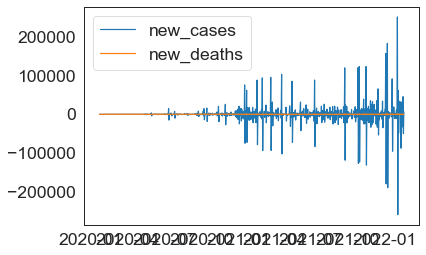

In [664]:
x = nc_data1['Date']
y1 = nc_data1['new_cases']
y2 = nc_data1['new_deaths']
plt.plot(x, y1, label = "new_cases")
plt.plot(x, y2, label = "new_deaths")
plt.legend()
plt.show()

In [665]:
# Top 5 highly infected counties
nc_data_counties_cases[:5]

County Name
Mecklenburg County     594117.0
Wake County            483509.0
Guilford County        244669.0
Forsyth County         190787.0
Cumberland County      157531.0
Name: Cases, dtype: float64

In [669]:
mck_cnty = nc_data[nc_data['County Name'] == 'Mecklenburg County ']
wak_cnty = nc_data[nc_data['County Name'] == 'Wake County ']
guil_cnty = nc_data[nc_data['County Name'] == 'Guilford County ']
for_cnty = nc_data[nc_data['County Name'] == 'Forsyth County ']
cum_cnty = nc_data[nc_data['County Name'] == 'Cumberland County ']

In [676]:
fin = pd.concat([mck_cnty,wak_cnty,guil_cnty,for_cnty,cum_cnty])

In [681]:
fin.head(3)

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population,new_cases,new_deaths,norm_new_cases,norm_new_deaths
1477342,37119,Mecklenburg County,NC,37,2020-01-22,0,0,1110356,0.0,0.0,0.0,0.0
1477343,37119,Mecklenburg County,NC,37,2020-01-23,0,0,1110356,0.0,0.0,0.0,0.0
1477344,37119,Mecklenburg County,NC,37,2020-01-24,0,0,1110356,0.0,0.0,0.0,0.0


### Top 5 infected counties Normalized New Cases

In [678]:
import plotly.express as px
fig = px.line(fin, x="Date", y="norm_new_cases", color='County Name',title='top 5 counties normalized high cases')
fig.show()

### Top 5 infected counties Normalized New deaths


In [682]:
import plotly.express as px
fig = px.line(fin, x="Date", y="norm_new_deaths", color='County Name',title='top 5 counties normalized high deaths')
fig.show()

# Task 2

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
#from fitter import Fitter, get_common_distributions, get_distributions

In [165]:
type(nc_new_cases1)

list

In [166]:
import statistics

print("The mean of North Carolina new cases is", round(statistics.mean(nc_new_cases1)))
print("The median of North Carolina new cases is", round(statistics.median(nc_new_cases1)))
print("The mode of North Carolina new cases is", round(statistics.mode(nc_new_cases1)))

The mean of North Carolina new cases is 100274
The median of North Carolina new cases is 54377
The mode of North Carolina new cases is 7


### Calculating PMF

In [404]:
t = pd.DataFrame()
t['nc_new_cases'] = nc_new_cases1

In [568]:
t

,nc_new_cases
0,11.0
1,7.0
2,10.0
3,8.0
4,10.0
...,...
752,40035.0
753,176505.0
754,80152.0
755,142494.0


In [405]:
pmf = t.value_counts().sort_index() / t.shape[0]
pmf  = pmf.reset_index()
pmf = pmf.rename(columns={0:'pmf'})

In [406]:
pmf.head()

,nc_new_cases,pmf
0,0.0,0.002642
1,2.0,0.001321
2,3.0,0.001321
3,4.0,0.006605
4,6.0,0.002642


In [407]:
x = pmf['nc_new_cases'].values
y = pmf['pmf'].values

In [408]:
pmf = t.value_counts().sort_index() / t.shape[0]
pmf  = pmf.reset_index()
pmf = pmf.rename(columns={0:'pmf'})

In [409]:
pmf.head()

,nc_new_cases,pmf
0,0.0,0.002642
1,2.0,0.001321
2,3.0,0.001321
3,4.0,0.006605
4,6.0,0.002642


In [410]:
x = pmf['nc_new_cases'].values
y = pmf['pmf'].values

<AxesSubplot:>

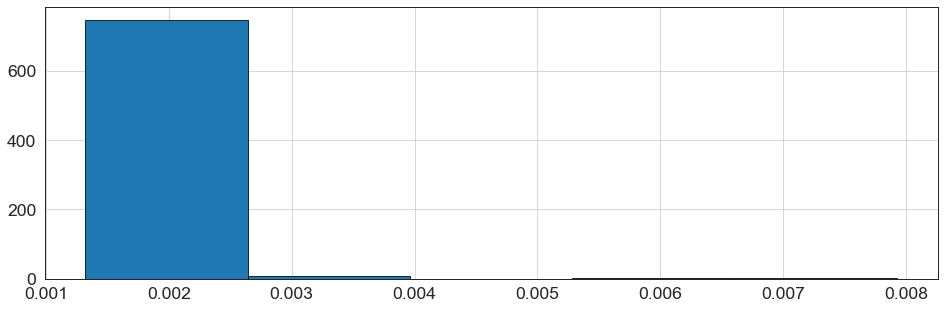

In [411]:
pmf['pmf'].hist(density=True, bins=5, ec='black', figsize=(16,5))


#### Describe the type of distribution (modality) and its statistics (moments of a distribution - center, variance, skewness, kurtosis) in the report and the notebook.


In [310]:
print("The mean of North Carolina new cases is", round(statistics.mean(nc_new_cases1)))
print("The variance of North Carolina new cases is",t['nc_new_cases'].var())
print("The kurtosis of North Carolina new cases is",t['nc_new_cases'].kurtosis())
print("The skewness of North Carolina new cases is",t['nc_new_cases'].skew())

The mean of North Carolina new cases is 100274
The variance of North Carolina new cases is 22375645256.733303
The kurtosis of North Carolina new cases is 23.476806410021915
The skewness of North Carolina new cases is 4.288500086475631


### Compare the distribution and its statistics to 5 other states of your choosing.

In [294]:

# Tennessee
te_cases = te_data.groupby('Date')['Cases'].sum()  
te_deaths = te_data.groupby('Date')['Death'].sum()

#Alabama
al_cases = al_data.groupby('Date')['Cases'].sum()  
al_deaths = al_data.groupby('Date')['Death'].sum()

al_new_cases = al_cases.diff()
al_new_deaths = al_deaths.diff()

te_new_cases = te_cases.diff()
te_new_deaths = te_deaths.diff()

te_new_cases = te_new_cases[1:]
te_new_deaths = te_new_deaths[1:]

al_new_cases = al_new_cases[1:]
al_new_deaths = al_new_deaths[1:]


al_new_cases1 = [] # alabama new cases filtering
for i in al_new_cases:
    if i <= 0:
        al_new_cases1.append(0)
    else:
        al_new_cases1.append(i)
        
al_new_cases1[:7]

te_new_cases1 = [] # tennessee new cases filtering
for i in te_new_cases:
    if i <= 0:
        te_new_cases1.append(0)
    else:
        te_new_cases1.append(i)
        
te_new_cases1[:7]

te_new_deaths1 = [] # tennessee new deaths filtering
for i in te_new_deaths:
    if i <= 0:
        te_new_deaths1.append(0)
    else:
        te_new_deaths1.append(i)
        
te_new_deaths1[:7]

al_new_deaths1[:7]

al_new_deaths1 = []  # virgina new deaths filtering
for i in al_new_deaths:
    if i <= 0:
        al_new_deaths1.append(0)
    else:
        al_new_deaths1.append(i)

### Calculating PMF

In [296]:
t_o = pd.DataFrame()
t_o['nm_new_cases'] = nm_new_cases1
t_o['va_new_cases'] = va_new_cases1
t_o['oh_new_cases'] = oh_new_cases1
t_o['te_new_cases'] = te_new_cases1
t_o['al_new_cases'] = al_new_cases1

In [321]:
pmf1 = t_o['nm_new_cases'].value_counts().sort_index() / t_o.shape[0]
pmf1  = pmf1.reset_index()
pmf1 = pmf1.rename(columns={'index':'nm_new_cases','nm_new_cases':'pmf1'})

pmf2 = t_o['va_new_cases'].value_counts().sort_index() / t_o.shape[0]
pmf2  = pmf2.reset_index()
pmf2 = pmf2.rename(columns={'index':'va_new_cases','va_new_cases':'pmf2'})

pmf3 = t_o['oh_new_cases'].value_counts().sort_index() / t_o.shape[0]
pmf3  = pmf3.reset_index()
pmf3 = pmf3.rename(columns={'index':'oh_new_cases','oh_new_cases':'pmf3'})

pmf4 = t_o['te_new_cases'].value_counts().sort_index() / t_o.shape[0]
pmf4  = pmf4.reset_index()
pmf4 = pmf4.rename(columns={'index':'te_new_cases','te_new_cases':'pmf4'})

pmf5 = t_o['al_new_cases'].value_counts().sort_index() / t_o.shape[0]
pmf5  = pmf5.reset_index()
pmf5 = pmf5.rename(columns={'index':'al_new_cases','al_new_cases':'pmf5'})

Text(0.5, 1.0, 'NC State plot')

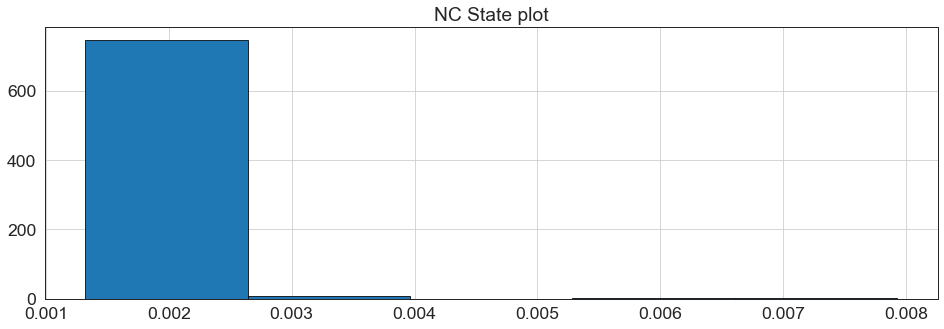

In [328]:
pmf['pmf'].hist(density=True, bins=5, ec='black', figsize=(16,5))
plt.title('NC State plot')

Text(0.5, 1.0, 'NM State plot')

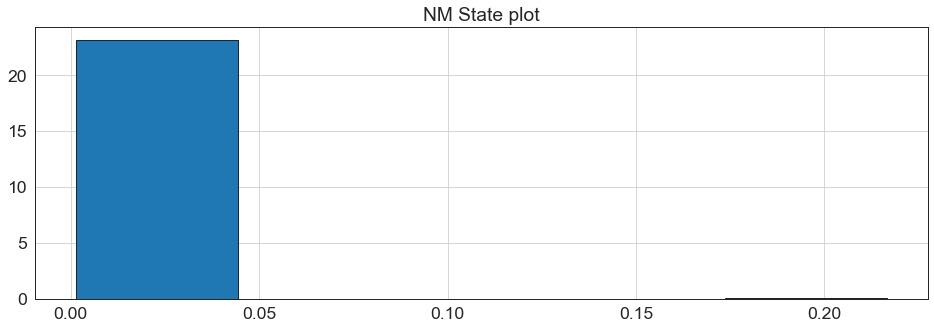

In [329]:
pmf1['pmf1'].hist(density=True, bins=5, ec='black', figsize=(16,5))
plt.title('NM State plot')

Text(0.5, 1.0, 'VA State plot')

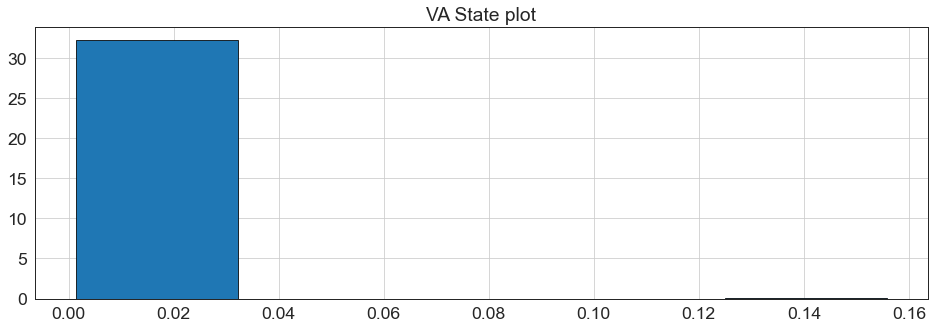

In [330]:
pmf2['pmf2'].hist(density=True, bins=5, ec='black', figsize=(16,5))
plt.title('VA State plot')

Text(0.5, 1.0, 'OH State plot')

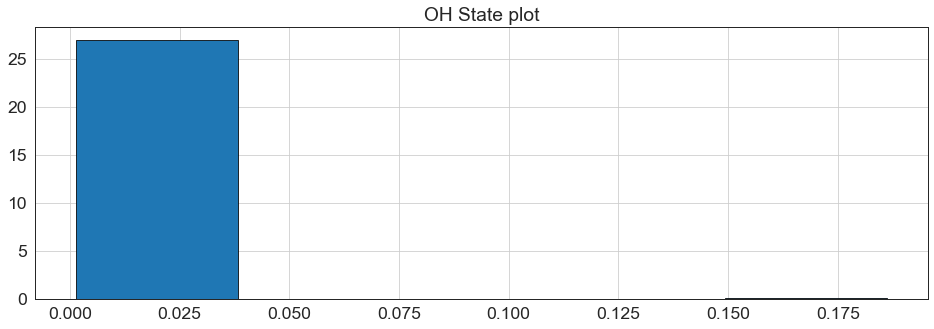

In [331]:
pmf3['pmf3'].hist(density=True, bins=5, ec='black', figsize=(16,5))
plt.title('OH State plot')

Text(0.5, 1.0, 'TE State plot')

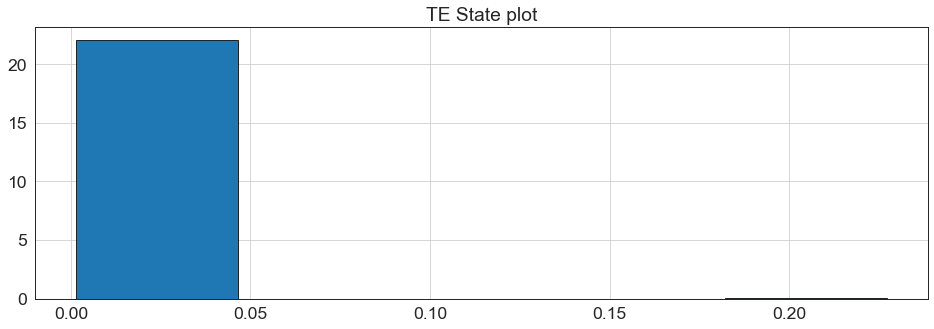

In [332]:
pmf4['pmf4'].hist(density=True, bins=5, ec='black', figsize=(16,5))
plt.title('TE State plot')

Text(0.5, 1.0, 'AL State plot')

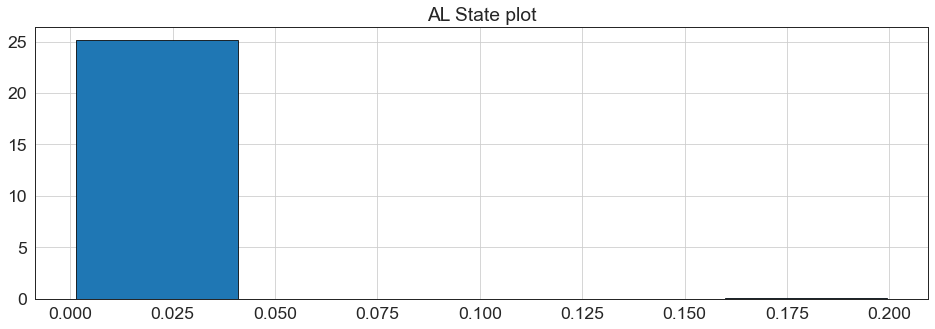

In [333]:
pmf5['pmf5'].hist(density=True, bins=5, ec='black', figsize=(16,5))
plt.title('AL State plot')

In [335]:
print("The mean of North Carolina new cases is", round(statistics.mean(nc_new_cases1)))
print("The variance of North Carolina new cases is",t['nc_new_cases'].var())
print("The kurtosis of North Carolina new cases is",t['nc_new_cases'].kurtosis())
print("The skewness of North Carolina new cases is",t['nc_new_cases'].skew())
print('\n')
print("The mean of New Mexico new cases is", round(statistics.mean(nm_new_cases1)))
print("The variance of New Mexico new cases is",t_o['nm_new_cases'].var())
print("The kurtosis of New Mexico new cases is",t_o['nm_new_cases'].kurtosis())
print("The skewness of New Mexico new cases is",t_o['nm_new_cases'].skew())
print('\n')
print("The mean of Virginia new cases is", round(statistics.mean(va_new_cases1)))
print("The variance of Virginia new cases is",t_o['va_new_cases'].var())
print("The kurtosis of Virginia new cases is",t_o['va_new_cases'].kurtosis())
print("The skewness of Virginia new cases is",t_o['va_new_cases'].skew())
print('\n')
print("The mean of Ohio new cases is", round(statistics.mean(oh_new_cases1)))
print("The variance of Ohio new cases is",t_o['oh_new_cases'].var())
print("The kurtosis of Ohio new cases is",t_o['oh_new_cases'].kurtosis())
print("The skewness of Ohio new cases is",t_o['oh_new_cases'].skew())
print('\n')
print("The mean of Tennessee new cases is", round(statistics.mean(te_new_cases1)))
print("The variance of Tennessee new cases is",t_o['te_new_cases'].var())
print("The kurtosis of Tennessee new cases is",t_o['te_new_cases'].kurtosis())
print("The skewness of Tennessee new cases is",t_o['te_new_cases'].skew())
print('\n')
print("The mean of Alabama new cases is", round(statistics.mean(al_new_cases1)))
print("The variance of Alabama new cases is",t_o['al_new_cases'].var())
print("The kurtosis of Alabama new cases is",t_o['al_new_cases'].kurtosis())
print("The skewness of Alabama new cases is",t_o['al_new_cases'].skew())

The mean of North Carolina new cases is 100274
The variance of North Carolina new cases is 22375645256.733303
The kurtosis of North Carolina new cases is 23.476806410021915
The skewness of North Carolina new cases is 4.288500086475631


The mean of New Mexico new cases is 660
The variance of New Mexico new cases is 1940671.0596513671
The kurtosis of New Mexico new cases is 80.45401892796491
The skewness of New Mexico new cases is 7.168635074270053


The mean of Virginia new cases is 2140
The variance of Virginia new cases is 18153480.553053334
The kurtosis of Virginia new cases is 66.26609464524121
The skewness of Virginia new cases is 6.8041110658193436


The mean of Ohio new cases is 3488
The variance of Ohio new cases is 45624524.21684733
The kurtosis of Ohio new cases is 59.584663260858676
The skewness of Ohio new cases is 6.079243502626896


The mean of Tennessee new cases is 2495
The variance of Tennessee new cases is 64548636.24691588
The kurtosis of Tennessee new cases is 117.3

### How do you describe a modality of a distribution ?


**The modality of a distribution is determined by the number of 
peaks it contains. Our values has only one peak, so it is unimodal distribution.**

**By seeing the mean and variance, we can see that distribution could be more skewed towards right and follow the poisson distribution.**

#### Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states. For example, number of new cases and deaths per 100,000 population. Hint - the parameter for a poission's distribution will be its mean value. Then for the minimum and maximum range of covid cases you are calculating probability mass function to observe the probability at different points.

In [436]:
import warnings
warnings.filterwarnings('ignore')

In [464]:
nc_data = sup_data[sup_data['State']=='NC']

In [465]:
nc_data = nc_data.groupby('Date')[['Cases','Death']].sum()
nc_data

,Cases,Death
Date,,
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0
...,...,...
2022-02-13,2524539,21665
2022-02-14,2539564,21781
2022-02-15,2542484,21835


In [466]:
nc_data['new_cases'] = nc_data['Cases'].diff()
nc_data['new_deaths'] = nc_data['Death'].diff()

In [467]:
nc_data = nc_data[1:]

In [468]:
nc_data['norm_new_cases'] = (nc_data['new_cases']/nc_pop)*100000
nc_data['norm_new_deaths'] = (nc_data['new_deaths']/nc_pop)*100000

In [469]:
nc_data.head(3)

,Cases,Death,new_cases,new_deaths,norm_new_cases,norm_new_deaths
Date,,,,,,
2020-01-23,0,0,0.0,0.0,0.0,0.0
2020-01-24,0,0,0.0,0.0,0.0,0.0
2020-01-25,0,0,0.0,0.0,0.0,0.0


In [471]:
nc_data.shape

(757, 6)

In [482]:
print("The mean number of new_cases in North Carolina are: ",mean(nc_data['new_cases']))
print("The median number of new_cases in North Carolina are: ",median(nc_data['new_cases']))
print("The mean number of new_deaths in North Carolina are: ",mean(nc_data['new_deaths']))
print("The median number of new_deaths in North Carolina are: ",median(nc_data['new_deaths']))
print('\n')
print("The mean number of normalized new_cases in North Carolina are: ",mean(nc_data['norm_new_cases']))
print("The median number of normalized new_cases in North Carolina are: ",median(nc_data['norm_new_cases']))
print("The mean number of normalized new_deaths in North Carolina are: ",mean(nc_data['norm_new_deaths']))
print("The median number of normalized new_deaths in North Carolina are: ",median(nc_data['norm_new_deaths']))
print('\n')
print("The total number of new_cases in North Carolina are: ",sum(nc_data['new_cases']))
print("The total number of new_deaths in North Carolina are: ",sum(nc_data['new_deaths']))
print('\n')
print("The total number of normalized new_cases in North Carolina are: ",sum(nc_data['norm_new_cases']))
print("The total number of normalized new_deaths in North Carolina are: ",sum(nc_data['norm_new_deaths']))
print('\n')
print("The skewness of normalized new_cases in North Carolina are: ",round(nc_data['norm_new_cases'].skew()))
print("The skewness of normalized new_deaths in North Carolina are: ",round(nc_data['norm_new_deaths'].skew()))
print('\n')
print("The kurtosis of normalized new_cases in North Carolina are: ",round(nc_data['norm_new_cases'].kurt()))
print("The kurtosis of normalized new_deaths in North Carolina are: ",round(nc_data['norm_new_deaths'].kurt()))

The mean number of new_cases in North Carolina are:  3374.0964332893
The median number of new_cases in North Carolina are:  1439.0
The mean number of new_deaths in North Carolina are:  29.142668428005283
The median number of new_deaths in North Carolina are:  17.0


The mean number of normalized new_cases in North Carolina are:  32.17076096348294
The median number of normalized new_cases in North Carolina are:  13.720332522127016
The mean number of normalized new_deaths in North Carolina are:  0.277864559704187
The median number of normalized new_deaths in North Carolina are:  0.1620887094344401


The total number of new_cases in North Carolina are:  2554191.0
The total number of new_deaths in North Carolina are:  22061.0


The total number of normalized new_cases in North Carolina are:  24353.266049356575
The total number of normalized new_deaths in North Carolina are:  210.3434716960694


The skewness of normalized new_cases in North Carolina are:  9
The skewness of normalized new_de

### North Carolina Poisson Distribution

In [533]:
from scipy import stats
c = stats.poisson.pmf(k=np.arange( int(min(nc_data['norm_new_cases'])),int(max(nc_data['norm_new_cases']))),mu=32 )
c

array([1.26641655e-14, 4.05253298e-13, 6.48405276e-12, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

Text(0.5, 1.0, 'North Carolina cases PMF values')

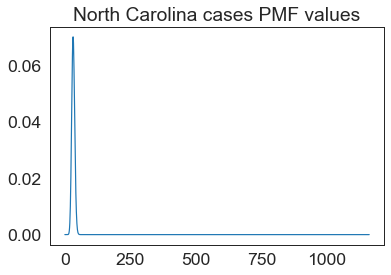

In [549]:
k=np.arange( int(min(nc_data['norm_new_cases'])),int(max(nc_data['norm_new_cases'])))
plt.plot(k,c)
plt.title('North Carolina cases PMF values')

### Death PMF values


In [543]:
from scipy import stats
d = stats.poisson.pmf(k=np.arange( int(min(nc_data['norm_new_deaths'])),int(max(nc_data['norm_new_deaths']))),mu=0.27 )
d

array([0.76337949, 0.20611246, 0.02782518])

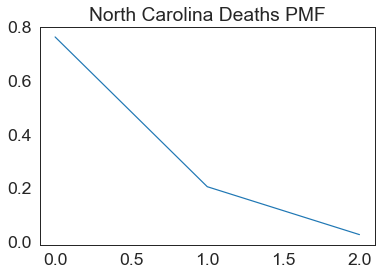

In [548]:
k=np.arange( int(min(nc_data['norm_new_deaths'])),int(max(nc_data['norm_new_deaths'])))
plt.title('North Carolina Deaths PMF')
plt.plot(k,d)

### Other 5 States

In [572]:
nm_data = sup_data[sup_data['State']=='NM']  #New Mexico
te_data = sup_data[sup_data['State']=='TN']  # Tennessee
va_data = sup_data[sup_data['State']=='VA']  # Virgina
oh_data = sup_data[sup_data['State']=='OH']  # Ohio
al_data = sup_data[sup_data['State']=='AL']  #Alabama

In [577]:
te_pop = te_data.groupby('County Name')['population'].unique().sum()
te_pop = te_pop[0]
al_pop = al_data.groupby('County Name')['population'].unique().sum()
al_pop = al_pop[0]

In [578]:
nm_data = nm_data.groupby('Date')[['Cases','Death']].sum()
te_data = te_data.groupby('Date')[['Cases','Death']].sum()
va_data = va_data.groupby('Date')[['Cases','Death']].sum()
oh_data = oh_data.groupby('Date')[['Cases','Death']].sum()
al_data = al_data.groupby('Date')[['Cases','Death']].sum()


In [579]:
nm_data['new_cases'] = nm_data['Cases'].diff()
nm_data['new_deaths'] = nm_data['Death'].diff()
te_data['new_cases'] = te_data['Cases'].diff()
te_data['new_deaths'] = te_data['Death'].diff()
va_data['new_cases'] = va_data['Cases'].diff()
va_data['new_deaths'] = va_data['Death'].diff()
oh_data['new_cases'] = oh_data['Cases'].diff()
oh_data['new_deaths'] = oh_data['Death'].diff()
al_data['new_cases'] = al_data['Cases'].diff()
al_data['new_deaths'] = al_data['Death'].diff()

In [580]:
nm_data = nm_data[1:]
te_data = te_data[1:]
va_data = va_data[1:]
oh_data = oh_data[1:]
al_data = al_data[1:]

In [581]:
nm_data['norm_new_cases'] = (nm_data['new_cases']/nm_pop)*100000
nm_data['norm_new_deaths'] = (nm_data['new_deaths']/nm_pop)*100000
te_data['norm_new_cases'] = (te_data['new_cases']/te_pop)*100000
te_data['norm_new_deaths'] = (te_data['new_deaths']/te_pop)*100000
va_data['norm_new_cases'] = (va_data['new_cases']/va_pop)*100000
va_data['norm_new_deaths'] = (va_data['new_deaths']/va_pop)*100000
oh_data['norm_new_cases'] = (oh_data['new_cases']/oh_pop)*100000
oh_data['norm_new_deaths'] = (oh_data['new_deaths']/oh_pop)*100000
al_data['norm_new_cases'] = (al_data['new_cases']/al_pop)*100000
al_data['norm_new_deaths'] = (al_data['new_deaths']/al_pop)*100000

In [582]:
nc_data.shape

(757, 6)

In [583]:
print("The mean number of new_cases in New Mexico are: ",mean(nm_data['new_cases']))
print("The median number of new_cases in New Mexico are: ",median(nm_data['new_cases']))
print("The mean number of new_deaths in New Mexico are: ",mean(nm_data['new_deaths']))
print("The median number of new_deaths in New Mexico are: ",median(nm_data['new_deaths']))
print('\n')
print("The mean number of normalized new_cases in New Mexico are: ",mean(nm_data['norm_new_cases']))
print("The median number of normalized new_cases in New Mexico are: ",median(nm_data['norm_new_cases']))
print("The mean number of normalized new_deaths in New Mexico are: ",mean(nm_data['norm_new_deaths']))
print("The median number of normalized new_deaths in New Mexico are: ",median(nm_data['norm_new_deaths']))
print('\n')
print("The total number of new_cases in New Mexico are: ",sum(nm_data['new_cases']))
print("The total number of new_deaths in New Mexico are: ",sum(nm_data['new_deaths']))
print('\n')
print("The total number of normalized new_cases in New Mexico are: ",sum(nm_data['norm_new_cases']))
print("The total number of normalized new_deaths in New Mexico are: ",sum(nm_data['norm_new_deaths']))
print('\n')
print("The skewness of normalized new_cases in New Mexico are: ",round(nm_data['norm_new_cases'].skew()))
print("The skewness of normalized new_deaths in New Mexico are: ",round(nm_data['norm_new_deaths'].skew()))
print('\n')
print("The kurtosis of normalized new_cases in New Mexico are: ",round(nm_data['norm_new_cases'].kurt()))
print("The kurtosis of normalized new_deaths in New Mexico are: ",round(nm_data['norm_new_deaths'].kurt()))

The mean number of new_cases in New Mexico are:  660.32892998679
The median number of new_cases in New Mexico are:  201.0
The mean number of new_deaths in New Mexico are:  8.911492734478204
The median number of new_deaths in New Mexico are:  5.0


The mean number of normalized new_cases in New Mexico are:  31.491787360189598
The median number of normalized new_cases in New Mexico are:  9.58590328538951
The mean number of normalized new_deaths in New Mexico are:  0.42499854468238485
The median number of normalized new_deaths in New Mexico are:  0.23845530560670422


The total number of new_cases in New Mexico are:  499869.0
The total number of new_deaths in New Mexico are:  6746.0


The total number of normalized new_cases in New Mexico are:  23839.283031663537
The total number of normalized new_deaths in New Mexico are:  321.72389832456474


The skewness of normalized new_cases in New Mexico are:  7
The skewness of normalized new_deaths in New Mexico are:  2


The kurtosis of normalize

In [597]:
from scipy import stats
c = stats.poisson.pmf(k=np.arange( int(min(nm_data['norm_new_cases'])),int(max(nm_data['norm_new_cases']))),mu=32 )

Text(0.5, 1.0, 'North Mexico cases PMF values')

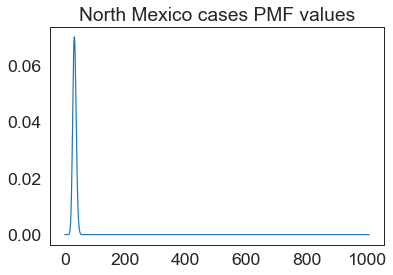

In [598]:
k=np.arange( int(min(nm_data['norm_new_cases'])),int(max(nm_data['norm_new_cases'])))
plt.plot(k,c)
plt.title('North Mexico cases PMF values')

In [ ]:
k=np.arange( int(min(nm_data['norm_new_deaths'])),int(max(nm_data['norm_new_deaths'])))
plt.title('North Mexico Deaths PMF')
plt.plot(k,d)

### Tennessee Results

In [588]:
print("The mean number of new_cases in Tennessee are: ",mean(te_data['new_cases']))
print("The median number of new_cases in Tennessee are: ",median(te_data['new_cases']))
print("The mean number of new_deaths in Tennessee are: ",mean(te_data['new_deaths']))
print("The median number of new_deaths in Tennessee are: ",median(te_data['new_deaths']))
print('\n')
print("The mean number of normalized new_cases in Tennessee are: ",mean(te_data['norm_new_cases']))
print("The median number of normalized new_cases in Tennessee are: ",median(te_data['norm_new_cases']))
print("The mean number of normalized new_deaths in Tennessee are: ",mean(te_data['norm_new_deaths']))
print("The median number of normalized new_deaths in Tennessee are: ",median(te_data['norm_new_deaths']))
print('\n')
print("The total number of new_cases in Tennessee are: ",sum(te_data['new_cases']))
print("The total number of new_deaths in Tennessee are: ",sum(te_data['new_deaths']))
print('\n')
print("The total number of normalized new_cases in Tennessee are: ",sum(te_data['norm_new_cases']))
print("The total number of normalized new_deaths in Tennessee are: ",sum(te_data['norm_new_deaths']))
print('\n')
print("The skewness of normalized new_cases in Tennessee are: ",round(te_data['norm_new_cases'].skew()))
print("The skewness of normalized new_deaths in Tennessee are: ",round(te_data['norm_new_deaths'].skew()))
print('\n')
print("The kurtosis of normalized new_cases in Tennessee are: ",round(te_data['norm_new_cases'].kurt()))
print("The kurtosis of normalized new_deaths in Tennessee are: ",round(te_data['norm_new_deaths'].kurt()))

The mean number of new_cases in Tennessee are:  2495.326287978864
The median number of new_cases in Tennessee are:  1045.0
The mean number of new_deaths in Tennessee are:  30.311756935270807
The median number of new_deaths in Tennessee are:  11.0


The mean number of normalized new_cases in Tennessee are:  36.539210861794764
The median number of normalized new_cases in Tennessee are:  15.30199699114417
The mean number of normalized new_deaths in Tennessee are:  0.443856854947184
The median number of normalized new_deaths in Tennessee are:  0.1610736525383597


The total number of new_cases in Tennessee are:  1888962.0
The total number of new_deaths in Tennessee are:  22946.0


The total number of normalized new_cases in Tennessee are:  27660.182622378634
The total number of normalized new_deaths in Tennessee are:  335.9996391950186


The skewness of normalized new_cases in Tennessee are:  10
The skewness of normalized new_deaths in Tennessee are:  17


The kurtosis of normalized new_ca

Text(0.5, 1.0, 'Tennessee cases PMF values')

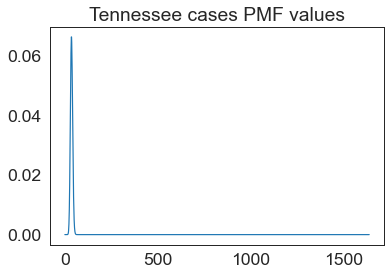

In [596]:
from scipy import stats
c = stats.poisson.pmf(k=np.arange( int(min(te_data['norm_new_cases'])),int(max(te_data['norm_new_cases']))),mu=36 )
plt.plot(c)
plt.title('Tennessee cases PMF values')

In [ ]:
k=np.arange( int(min(te_data['norm_new_deaths'])),int(max(te_data['norm_new_deaths'])))
plt.title('Tennessee Deaths PMF')
plt.plot(k,d)

### Virginia Results

In [552]:
from scipy import stats
c = stats.poisson.pmf(k=np.arange( int(min(nm_data['norm_new_deaths'])),int(max(nm_data['norm_new_deaths']))),mu=0.08 )

In [590]:
print("The mean number of new_cases in Virgina are: ",mean(va_data['new_cases']))
print("The median number of new_cases in Virgina are: ",median(va_data['new_cases']))
print("The mean number of new_deaths in Virgina are: ",mean(va_data['new_deaths']))
print("The median number of new_deaths in Virginia are: ",median(va_data['new_deaths']))
print('\n')
print("The mean number of normalized new_cases in Virginia are: ",mean(va_data['norm_new_cases']))
print("The median number of normalized new_cases in Virginia are: ",median(va_data['norm_new_cases']))
print("The mean number of normalized new_deaths in Virginia are: ",mean(va_data['norm_new_deaths']))
print("The median number of normalized new_deaths in Virginia are: ",median(va_data['norm_new_deaths']))
print('\n')
print("The total number of new_cases in Virginia are: ",sum(va_data['new_cases']))
print("The total number of new_deaths in Virginia are: ",sum(va_data['new_deaths']))
print('\n')
print("The total number of normalized new_cases in Virginia are: ",sum(va_data['norm_new_cases']))
print("The total number of normalized new_deaths in Virginia are: ",sum(va_data['norm_new_deaths']))
print('\n')
print("The skewness of normalized new_cases in Virginia are: ",round(va_data['norm_new_cases'].skew()))
print("The skewness of normalized new_deaths in Virginia are: ",round(va_data['norm_new_deaths'].skew()))
print('\n')
print("The kurtosis of normalized new_cases in Virginia are: ",round(va_data['norm_new_cases'].kurt()))
print("The kurtosis of normalized new_deaths in Virginia are: ",round(va_data['norm_new_deaths'].kurt()))

The mean number of new_cases in Virgina are:  2139.8137384412153
The median number of new_cases in Virgina are:  999.0
The mean number of new_deaths in Virgina are:  23.70805812417437
The median number of new_deaths in Virginia are:  13.0


The mean number of normalized new_cases in Virginia are:  25.119987594355955
The median number of normalized new_cases in Virginia are:  11.727594395689035
The mean number of normalized new_deaths in Virginia are:  0.2783168063961334
The median number of normalized new_deaths in Virginia are:  0.15261133848243988


The total number of new_cases in Virginia are:  1619839.0
The total number of new_deaths in Virginia are:  17947.0


The total number of normalized new_cases in Virginia are:  19015.830608927456
The total number of normalized new_deaths in Virginia are:  210.68582244187309


The skewness of normalized new_cases in Virginia are:  7
The skewness of normalized new_deaths in Virginia are:  5


The kurtosis of normalized new_cases in Virginia 

Text(0.5, 1.0, 'Virginia cases PMF values')

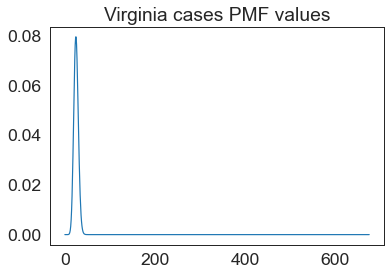

In [591]:
from scipy import stats
c = stats.poisson.pmf(k=np.arange( int(min(va_data['norm_new_cases'])),int(max(va_data['norm_new_cases']))),mu=25 )
plt.plot(c)
plt.title('Virginia cases PMF values')

In [ ]:
k=np.arange( int(min(va_data['norm_new_deaths'])),int(max(va_data['norm_new_deaths'])))
plt.title('Virginia Deaths PMF')
plt.plot(k,d)

### Ohio Results

In [592]:
print("The mean number of new_cases in Ohio are: ",mean(oh_data['new_cases']))
print("The median number of new_cases in Ohio are: ",median(oh_data['new_cases']))
print("The mean number of new_deaths in Ohio are: ",mean(oh_data['new_deaths']))
print("The median number of new_deaths in Ohio are: ",median(oh_data['new_deaths']))
print('\n')
print("The mean number of normalized new_cases in Ohio are: ",mean(oh_data['norm_new_cases']))
print("The median number of normalized new_cases in Ohio are: ",median(oh_data['norm_new_cases']))
print("The mean number of normalized new_deaths in Ohio are: ",mean(oh_data['norm_new_deaths']))
print("The median number of normalized new_deaths in Ohio are: ",median(oh_data['norm_new_deaths']))
print('\n')
print("The total number of new_cases in Ohio are: ",sum(oh_data['new_cases']))
print("The total number of new_deaths in Ohio are: ",sum(oh_data['new_deaths']))
print('\n')
print("The total number of normalized new_cases in Ohio are: ",sum(oh_data['norm_new_cases']))
print("The total number of normalized new_deaths in Ohio are: ",sum(oh_data['norm_new_deaths']))
print('\n')
print("The skewness of normalized new_cases in Ohio are: ",round(oh_data['norm_new_cases'].skew()))
print("The skewness of normalized new_deaths in Ohio are: ",round(oh_data['norm_new_deaths'].skew()))
print('\n')
print("The kurtosis of normalized new_cases in Ohio are: ",round(oh_data['norm_new_cases'].kurt()))
print("The kurtosis of normalized new_deaths in Ohio are: ",round(oh_data['norm_new_deaths'].kurt()))

The mean number of new_cases in Ohio are:  3487.7159841479524
The median number of new_cases in Ohio are:  1205.0
The mean number of new_deaths in Ohio are:  46.71994715984148
The median number of new_deaths in Ohio are:  10.0


The mean number of normalized new_cases in Ohio are:  29.837335501860302
The median number of normalized new_cases in Ohio are:  10.308749176583314
The mean number of normalized new_deaths in Ohio are:  0.3996881467336363
The median number of normalized new_deaths in Ohio are:  0.08554978569778683


The total number of new_cases in Ohio are:  2640201.0
The total number of new_deaths in Ohio are:  35367.0


The total number of normalized new_cases in Ohio are:  22586.862974908257
The total number of normalized new_deaths in Ohio are:  302.5639270773625


The skewness of normalized new_cases in Ohio are:  6
The skewness of normalized new_deaths in Ohio are:  10


The kurtosis of normalized new_cases in Ohio are:  60
The kurtosis of normalized new_deaths in Ohio a

Text(0.5, 1.0, 'Ohio cases PMF values')

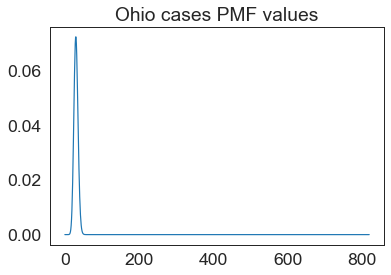

In [593]:
from scipy import stats
c = stats.poisson.pmf(k=np.arange( int(min(oh_data['norm_new_cases'])),int(max(oh_data['norm_new_cases']))),mu=30 )
plt.plot(c)
plt.title('Ohio cases PMF values')

In [ ]:
k=np.arange( int(min(oh_data['norm_new_deaths'])),int(max(oh_data['norm_new_deaths'])))
plt.title('Ohio Deaths PMF')
plt.plot(k,d)

### Alabama Results

In [594]:
print("The mean number of new_cases in Alabama are: ",mean(al_data['new_cases']))
print("The median number of new_cases in Alabama are: ",median(al_data['new_cases']))
print("The mean number of new_deaths in Alabama are: ",mean(al_data['new_deaths']))
print("The median number of new_deaths in Alabama are: ",median(al_data['new_deaths']))
print('\n')
print("The mean number of normalized new_cases in Alabama are: ",mean(al_data['norm_new_cases']))
print("The median number of normalized new_cases in Alabama are: ",median(al_data['norm_new_cases']))
print("The mean number of normalized new_deaths in Alabama are: ",mean(al_data['norm_new_deaths']))
print("The median number of normalized new_deaths in Alabama are: ",median(al_data['norm_new_deaths']))
print('\n')
print("The total number of new_cases in Alabama are: ",sum(al_data['new_cases']))
print("The total number of new_deaths in Alabama are: ",sum(al_data['new_deaths']))
print('\n')
print("The total number of normalized new_cases in Alabama are: ",sum(al_data['norm_new_cases']))
print("The total number of normalized new_deaths in Alabama are: ",sum(al_data['norm_new_deaths']))
print('\n')
print("The skewness of normalized new_cases in Alabama are: ",round(al_data['norm_new_cases'].skew()))
print("The skewness of normalized new_deaths in Alabama are: ",round(al_data['norm_new_deaths'].skew()))
print('\n')
print("The kurtosis of normalized new_cases in Alabama are: ",round(al_data['norm_new_cases'].kurt()))
print("The kurtosis of normalized new_deaths in Alabama are: ",round(al_data['norm_new_deaths'].kurt()))

The mean number of new_cases in Alabama are:  1677.6948480845442
The median number of new_cases in Alabama are:  682.0
The mean number of new_deaths in Alabama are:  23.49669749009247
The median number of new_deaths in Alabama are:  9.0


The mean number of normalized new_cases in Alabama are:  34.21642968977398
The median number of normalized new_cases in Alabama are:  13.90932628485362
The mean number of normalized new_deaths in Alabama are:  0.4792129501557145
The median number of normalized new_deaths in Alabama are:  0.1835541591842853


The total number of new_cases in Alabama are:  1270015.0
The total number of new_deaths in Alabama are:  17787.0


The total number of normalized new_cases in Alabama are:  25901.837275158905
The total number of normalized new_deaths in Alabama are:  362.76420326787576


The skewness of normalized new_cases in Alabama are:  11
The skewness of normalized new_deaths in Alabama are:  4


The kurtosis of normalized new_cases in Alabama are:  153
The k

Text(0.5, 1.0, 'Alabama cases PMF values')

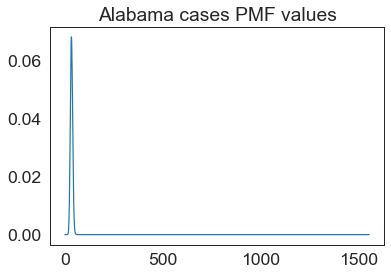

In [595]:
from scipy import stats
c = stats.poisson.pmf(k=np.arange( int(min(al_data['norm_new_cases'])),int(max(al_data['norm_new_cases']))),mu=34 )
plt.plot(c)
plt.title('Alabama cases PMF values')

In [ ]:
k=np.arange( int(min(al_data['norm_new_deaths'])),int(max(al_data['norm_new_deaths'])))
plt.title('Alabama Deaths PMF')
plt.plot(k,d)

### Model poission distributions for North Carolina counties COVID-19 in cases and deaths. For example, number of new cases and deaths per 100,000 populations.


In [599]:
nc_data = sup_data[sup_data['State']=='NC']
nc_data

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,population
1484922,37139,Pasquotank County,NC,37,2020-01-22,0,0,39824
1485680,37141,Pender County,NC,37,2020-01-22,0,0,63060
1486438,37143,Perquimans County,NC,37,2020-01-22,0,0,13463
1487196,37145,Person County,NC,37,2020-01-22,0,0,39490
1487954,37147,Pitt County,NC,37,2020-01-22,0,0,180742
...,...,...,...,...,...,...,...,...
1505387,37191,Wayne County,NC,37,2022-02-17,27305,372,123131
1508419,37199,Yancey County,NC,37,2022-02-17,4696,50,18069
1507661,37197,Yadkin County,NC,37,2022-02-17,10497,101,37667
1506903,37195,Wilson County,NC,37,2022-02-17,21010,292,81801


In [613]:
nc_counties = nc_data.groupby(['County Name','Date'])[['Cases','Death']].sum()
nc_counties = nc_counties.reset_index()
nc_counties['new_cases'] = nc_counties['Cases'].diff()
nc_counties['new_deaths'] = nc_counties['Death'].diff()
nc_counties.head()

,County Name,Date,Cases,Death,new_cases,new_deaths
0,Alamance County,2020-01-22,0,0,NaN,NaN
1,Alamance County,2020-01-23,0,0,0.0,0.0
2,Alamance County,2020-01-24,0,0,0.0,0.0
3,Alamance County,2020-01-25,0,0,0.0,0.0
4,Alamance County,2020-01-26,0,0,0.0,0.0


In [623]:
nc_counties['County Name'].value_counts()

Alamance County       758
Nash County           758
Pitt County           758
Person County         758
Perquimans County     758
                     ... 
Duplin County         758
Davie County          758
Davidson County       758
Dare County           758
Yancey County         758
Name: County Name, Length: 100, dtype: int64

In [619]:
# Alamance County
ala_cnty = nc_counties[nc_counties['County Name']=='Alamance County ']
ala_cnty = ala_cnty[1:]
ala_cnty.head()

,County Name,Date,Cases,Death,new_cases,new_deaths
1,Alamance County,2020-01-23,0,0,0.0,0.0
2,Alamance County,2020-01-24,0,0,0.0,0.0
3,Alamance County,2020-01-25,0,0,0.0,0.0
4,Alamance County,2020-01-26,0,0,0.0,0.0
5,Alamance County,2020-01-27,0,0,0.0,0.0


In [620]:
ala_cnty['new_cases_norm'] = (ala_cnty['new_cases']/nc_pop)*100000
ala_cnty['new_deaths_norm'] = (ala_cnty['new_deaths']/nc_pop)*100000
ala_cnty

,County Name,Date,Cases,Death,new_cases,new_deaths,new_cases_norm,new_deaths_norm
1,Alamance County,2020-01-23,0,0,0.0,0.0,0.000000,0.000000
2,Alamance County,2020-01-24,0,0,0.0,0.0,0.000000,0.000000
3,Alamance County,2020-01-25,0,0,0.0,0.0,0.000000,0.000000
4,Alamance County,2020-01-26,0,0,0.0,0.0,0.000000,0.000000
5,Alamance County,2020-01-27,0,0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
753,Alamance County,2022-02-13,45074,427,0.0,0.0,0.000000,0.000000
754,Alamance County,2022-02-14,45392,427,318.0,0.0,3.032012,0.000000
755,Alamance County,2022-02-15,45410,427,18.0,0.0,0.171623,0.000000
756,Alamance County,2022-02-16,45488,428,78.0,1.0,0.743701,0.009535


In [639]:
# Nash County
na_cnty = nc_counties[nc_counties['County Name']=='Nash County ']
na_cnty = na_cnty[1:]
na_cnty.head()

,County Name,Date,Cases,Death,new_cases,new_deaths
47755,Nash County,2020-01-23,0,0,0.0,0.0
47756,Nash County,2020-01-24,0,0,0.0,0.0
47757,Nash County,2020-01-25,0,0,0.0,0.0
47758,Nash County,2020-01-26,0,0,0.0,0.0
47759,Nash County,2020-01-27,0,0,0.0,0.0


In [640]:
na_cnty['new_cases_norm'] = (na_cnty['new_cases']/nc_pop)*100000
na_cnty['new_deaths_norm'] = (na_cnty['new_deaths']/nc_pop)*100000
na_cnty

,County Name,Date,Cases,Death,new_cases,new_deaths,new_cases_norm,new_deaths_norm
47755,Nash County,2020-01-23,0,0,0.0,0.0,0.000000,0.000000
47756,Nash County,2020-01-24,0,0,0.0,0.0,0.000000,0.000000
47757,Nash County,2020-01-25,0,0,0.0,0.0,0.000000,0.000000
47758,Nash County,2020-01-26,0,0,0.0,0.0,0.000000,0.000000
47759,Nash County,2020-01-27,0,0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
48507,Nash County,2022-02-13,26501,281,0.0,0.0,0.000000,0.000000
48508,Nash County,2022-02-14,26634,281,133.0,0.0,1.268106,0.000000
48509,Nash County,2022-02-15,26658,281,24.0,0.0,0.228831,0.000000
48510,Nash County,2022-02-16,26683,282,25.0,1.0,0.238366,0.009535


In [628]:
# Pitt County
pt_cnty = nc_counties[nc_counties['County Name']=='Pitt County ']
pt_cnty = pt_cnty[1:]
pt_cnty.head()

,County Name,Date,Cases,Death,new_cases,new_deaths
55335,Pitt County,2020-01-23,0,0,0.0,0.0
55336,Pitt County,2020-01-24,0,0,0.0,0.0
55337,Pitt County,2020-01-25,0,0,0.0,0.0
55338,Pitt County,2020-01-26,0,0,0.0,0.0
55339,Pitt County,2020-01-27,0,0,0.0,0.0


In [629]:
pt_cnty['new_cases_norm'] = (pt_cnty['new_cases']/nc_pop)*100000
pt_cnty['new_deaths_norm'] = (pt_cnty['new_deaths']/nc_pop)*100000
pt_cnty

,County Name,Date,Cases,Death,new_cases,new_deaths,new_cases_norm,new_deaths_norm
55335,Pitt County,2020-01-23,0,0,0.0,0.0,0.000000,0.0
55336,Pitt County,2020-01-24,0,0,0.0,0.0,0.000000,0.0
55337,Pitt County,2020-01-25,0,0,0.0,0.0,0.000000,0.0
55338,Pitt County,2020-01-26,0,0,0.0,0.0,0.000000,0.0
55339,Pitt County,2020-01-27,0,0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
56087,Pitt County,2022-02-13,51008,146,0.0,0.0,0.000000,0.0
56088,Pitt County,2022-02-14,51287,146,279.0,0.0,2.660162,0.0
56089,Pitt County,2022-02-15,51323,146,36.0,0.0,0.343247,0.0
56090,Pitt County,2022-02-16,51471,146,148.0,0.0,1.411125,0.0


In [632]:
print("The mean number of new_cases in Alamance County are: ",mean(ala_cnty['new_cases']))
print("The median number of new_cases in Alamance County are: ",median(ala_cnty['new_cases']))
print("The mean number of new_deaths in Alamance County are: ",mean(ala_cnty['new_deaths']))
print("The median number of new_deaths in Alamance County are: ",median(ala_cnty['new_deaths']))
print('\n')
print("The mean number of normalized new_cases in Alamance County are: ",mean(ala_cnty['new_cases_norm']))
print("The median number of normalized new_cases in Alamance County are: ",median(ala_cnty['new_cases_norm']))
print("The mean number of normalized new_deaths in Alamance County are: ",mean(ala_cnty['new_deaths_norm']))
print("The median number of normalized new_deaths in Alamance County are: ",median(ala_cnty['new_deaths_norm']))
print('\n')
print("The total number of new_cases in Alamance County are: ",sum(ala_cnty['new_cases']))
print("The total number of new_deaths in Alamance County are: ",sum(ala_cnty['new_deaths']))
print('\n')
print("The total number of normalized new_cases in Alamance County are: ",sum(ala_cnty['new_cases_norm']))
print("The total number of normalized new_deaths in Alamance County are: ",sum(ala_cnty['new_deaths_norm']))
print('\n')
print("The skewness of normalized new_cases in Alamance County are: ",round(ala_cnty['new_cases_norm'].skew()))
print("The skewness of normalized new_deaths in Alamance County are: ",round(ala_cnty['new_deaths_norm'].skew()))
print('\n')
print("The kurtosis of normalized new_cases in Alamance County are: ",round(ala_cnty['new_cases_norm'].kurt()))
print("The kurtosis of normalized new_deaths in Alamance County are: ",round(ala_cnty['new_deaths_norm'].kurt()))

The mean number of new_cases in Alamance County are:  60.1664464993395
The median number of new_cases in Alamance County are:  26.0
The mean number of new_deaths in Alamance County are:  0.5653896961690885
The median number of new_deaths in Alamance County are:  0.0


The mean number of normalized new_cases in Alamance County are:  0.5736648037843661
The median number of normalized new_cases in Alamance County are:  0.24790037913502597
The mean number of normalized new_deaths in Alamance County are:  0.005390781539975161
The median number of normalized new_deaths in Alamance County are:  0.0


The total number of new_cases in Alamance County are:  45546.0
The total number of new_deaths in Alamance County are:  428.0


The total number of normalized new_cases in Alamance County are:  434.2642564647651
The total number of normalized new_deaths in Alamance County are:  4.080821625761194


The skewness of normalized new_cases in Alamance County are:  8
The skewness of normalized new_deaths

Text(0.5, 1.0, 'Alamance County new cases PMF values')

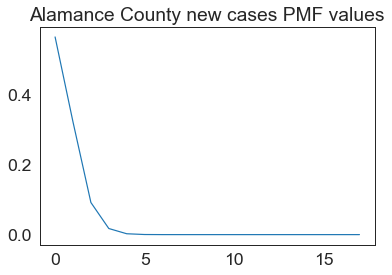

In [636]:
from scipy import stats
c = stats.poisson.pmf(k=np.arange( int(min(ala_cnty['new_cases_norm'])),int(max(ala_cnty['new_cases_norm']))),mu=0.57 )
plt.plot(c)
plt.title('Alamance County new cases PMF values')

In [ ]:
from scipy import stats
d = stats.poisson.pmf(k=np.arange( int(min(ala_cnty['new_deaths_norm'])),int(max(ala_cnty['new_deaths_norm']))),mu=0.0057 )
plt.plot(d)
plt.title('Alamance County new deaths PMF values')

In [641]:
print("The mean number of new_cases in Nash County are: ",mean(na_cnty['new_cases']))
print("The median number of new_cases in Nash County are: ",median(na_cnty['new_cases']))
print("The mean number of new_deaths in Nash County are: ",mean(na_cnty['new_deaths']))
print("The median number of new_deaths in Nash County are: ",median(na_cnty['new_deaths']))
print('\n')
print("The mean number of normalized new_cases in Nash County are: ",mean(na_cnty['new_cases_norm']))
print("The median number of normalized new_cases in Nash County are: ",median(na_cnty['new_cases_norm']))
print("The mean number of normalized new_deaths in Nash County are: ",mean(na_cnty['new_deaths_norm']))
print("The median number of normalized new_deaths in Nash County are: ",median(na_cnty['new_deaths_norm']))
print('\n')
print("The total number of new_cases in Nash County are: ",sum(na_cnty['new_cases']))
print("The total number of new_deaths in Nash County are: ",sum(na_cnty['new_deaths']))
print('\n')
print("The total number of normalized new_cases in Nash County are: ",sum(na_cnty['new_cases_norm']))
print("The total number of normalized new_deaths in Nash County are: ",sum(na_cnty['new_deaths_norm']))
print('\n')
print("The skewness of normalized new_cases in Nash County are: ",round(na_cnty['new_cases_norm'].skew()))
print("The skewness of normalized new_deaths in Nash County are: ",round(na_cnty['new_deaths_norm'].skew()))
print('\n')
print("The kurtosis of normalized new_cases in Nash County are: ",round(na_cnty['new_cases_norm'].kurt()))
print("The kurtosis of normalized new_deaths in Nash County are: ",round(na_cnty['new_deaths_norm'].kurt()))

The mean number of new_cases in Nash County are:  35.28137384412153
The median number of new_cases in Nash County are:  13.0
The mean number of new_deaths in Nash County are:  0.37384412153236457
The median number of new_deaths in Nash County are:  0.0


The mean number of normalized new_cases in Nash County are:  0.3363948443216276
The median number of normalized new_cases in Nash County are:  0.12395018956751298
The mean number of normalized new_deaths in Nash County are:  0.003564465364048997
The median number of normalized new_deaths in Nash County are:  0.0


The total number of new_cases in Nash County are:  26708.0
The total number of new_deaths in Nash County are:  283.0


The total number of normalized new_cases in Nash County are:  254.6508971514721
The total number of normalized new_deaths in Nash County are:  2.698300280585091


The skewness of normalized new_cases in Nash County are:  9
The skewness of normalized new_deaths in Nash County are:  4


The kurtosis of normaliz

Text(0.5, 1.0, 'Nash County new cases PMF values')

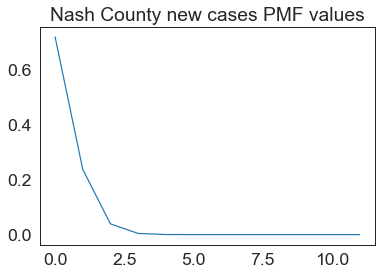

In [643]:
from scipy import stats
c = stats.poisson.pmf(k=np.arange( int(min(na_cnty['new_cases_norm'])),int(max(na_cnty['new_cases_norm']))),mu=0.33 )
plt.plot(c)
plt.title('Nash County new cases PMF values')

In [ ]:
from scipy import stats
d = stats.poisson.pmf(k=np.arange( int(min(na_cnty['new_deaths_norm'])),int(max(na_cnty['new_deaths_norm']))),mu=0.0035 )
plt.plot(d)
plt.title('Nash County new deaths PMF values')

In [642]:
print("The mean number of new_cases in Pitt County are: ",mean(pt_cnty['new_cases']))
print("The median number of new_cases in Pitt County are: ",median(pt_cnty['new_cases']))
print("The mean number of new_deaths in Pitt County are: ",mean(pt_cnty['new_deaths']))
print("The median number of new_deaths in Pitt County are: ",median(pt_cnty['new_deaths']))
print('\n')
print("The mean number of normalized new_cases in Pitt County are: ",mean(pt_cnty['new_cases_norm']))
print("The median number of normalized new_cases in Pitt County are: ",median(pt_cnty['new_cases_norm']))
print("The mean number of normalized new_deaths in Pitt County are: ",mean(pt_cnty['new_deaths_norm']))
print("The median number of normalized new_deaths in Pitt County are: ",median(pt_cnty['new_deaths_norm']))
print('\n')
print("The total number of new_cases in Pitt County are: ",sum(pt_cnty['new_cases']))
print("The total number of new_deaths in Pitt County are: ",sum(pt_cnty['new_deaths']))
print('\n')
print("The total number of normalized new_cases in Pitt County are: ",sum(pt_cnty['new_cases_norm']))
print("The total number of normalized new_deaths in Pitt County are: ",sum(pt_cnty['new_deaths_norm']))
print('\n')
print("The skewness of normalized new_cases in Pitt County are: ",round(pt_cnty['new_cases_norm'].skew()))
print("The skewness of normalized new_deaths in Pitt County are: ",round(pt_cnty['new_deaths_norm'].skew()))
print('\n')
print("The kurtosis of normalized new_cases in Pitt County are: ",round(pt_cnty['new_cases_norm'].kurt()))
print("The kurtosis of normalized new_deaths in Pitt County are: ",round(pt_cnty['new_deaths_norm'].kurt()))

The mean number of new_cases in Pitt County are:  68.12945838837517
The median number of new_cases in Pitt County are:  25.0
The mean number of new_deaths in Pitt County are:  0.1928665785997358
The median number of new_deaths in Pitt County are:  0.0


The mean number of normalized new_cases in Pitt County are:  0.6495891755670069
The median number of normalized new_cases in Pitt County are:  0.2383657491682942
The mean number of normalized new_deaths in Pitt County are:  0.001838911459898069
The median number of normalized new_deaths in Pitt County are:  0.0


The total number of new_cases in Pitt County are:  51574.0
The total number of new_deaths in Pitt County are:  146.0


The total number of normalized new_cases in Pitt County are:  491.73900590422437
The total number of normalized new_deaths in Pitt County are:  1.3920559751428399


The skewness of normalized new_cases in Pitt County are:  9
The skewness of normalized new_deaths in Pitt County are:  5


The kurtosis of normaliz

Text(0.5, 1.0, 'Pitt County new cases PMF values')

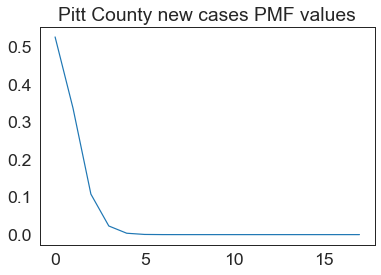

In [646]:
from scipy import stats
c = stats.poisson.pmf(k=np.arange( int(min(ala_cnty['new_cases_norm'])),int(max(ala_cnty['new_cases_norm']))),mu=0.64 )
plt.plot(c)
plt.title('Pitt County new cases PMF values')

In [ ]:
from scipy import stats
d = stats.poisson.pmf(k=np.arange( int(min(ala_cnty['new_deaths_norm'])),int(max(ala_cnty['new_death_norm']))),mu=0.0018 )
plt.plot(d)
plt.title('Pitt County new deaths PMF values')

#### Perform corelation between Enrichment data variables and COVID-19 cases to observe any patterns. You can compare either within your chosen specific state or among different states with the different enrichment variables. Within the state you can compare the county based covid data to enrichment data for correlation. Between states you would need to aggregate to state level data and then perform correlation. Both covid and enrichment data will need to be normalized for population. For number of covid cases you can use a measure of center value (median or mean) to compare the number of cases.

In [685]:
merged = pd.read_csv('C:\\Users\\ALURU PRANEETH\\Documents\\Data Science UNCG\\CSC605_SP22_Group7\\data\\merged_file.csv')
merged.head()

,Year,Month,State,Cases,Death,Employement
0,2020,January,Alaska,0,0,2123550
1,2020,January,Alabama,0,0,14323865
2,2020,January,Arkansas,0,0,8869770
3,2020,January,Arizona,6,0,22066206
4,2020,January,California,7594,0,130691423


In [691]:
nc_data = merged[merged['State']=='North Carolina']
nm_data = merged[merged['State']=='New Mexico']
oh_data = merged[merged['State']=='Ohio']

In [ ]:
nc_data

In [693]:
nc_data['new_cases'] = nc_data['Cases'].diff()
nc_data['new_deaths'] = nc_data['Death'].diff()
nm_data['new_cases'] = nm_data['Cases'].diff()
nm_data['new_deaths'] = nm_data['Death'].diff()
oh_data['new_cases'] = oh_data['Cases'].diff()
oh_data['new_deaths'] = oh_data['Death'].diff()


In [694]:
nm_data = nm_data[1:]
oh_data = oh_data[1:]
nc_data = nc_data[1:]

In [695]:
nc_data['norm_new_cases'] = (nc_data['new_cases']/nm_pop)*100000
nc_data['norm_new_deaths'] = (nc_data['new_deaths']/nm_pop)*100000
nm_data['norm_new_cases'] = (nm_data['new_cases']/nm_pop)*100000
nm_data['norm_new_deaths'] = (nm_data['new_deaths']/nm_pop)*100000
oh_data['norm_new_cases'] = (oh_data['new_cases']/oh_pop)*100000
oh_data['norm_new_deaths'] = (oh_data['new_deaths']/oh_pop)*100000



In [697]:
nc_data['norm_employment_number'] = (nc_data['Employement']/nm_pop)*100000
nm_data['norm_employment_number'] = (nm_data['Employement']/nm_pop)*100000
oh_data['norm_employment_number'] = (oh_data['Employement']/oh_pop)*100000

In [699]:
nc_data.head()

,Year,Month,State,Cases,Death,Employement,new_cases,new_deaths,norm_new_cases,norm_new_deaths,norm_employment_number
78,2020,February,North Carolina,0,0,33104501,0.0,0.0,0.000000,0.000000,1.578789e+06
129,2020,March,North Carolina,8419,27,33004725,8419.0,27.0,401.511044,1.287659,1.574030e+06
180,2020,April,North Carolina,164854,4551,29088733,156435.0,4524.0,7460.551147,215.754361,1.387273e+06
231,2020,May,North Carolina,570697,19602,29891585,405843.0,15051.0,19355.083319,717.798161,1.425561e+06
282,2020,June,North Carolina,1373475,33831,30952530,802778.0,14229.0,38285.334665,678.596109,1.476159e+06


In [702]:
final1 = nc_data[['norm_new_cases','norm_new_deaths','norm_employment_number']]
final2 = nm_data[['norm_new_cases','norm_new_deaths','norm_employment_number']]
final3 = oh_data[['norm_new_cases','norm_new_deaths','norm_employment_number']]

In [706]:
final1.corr()  #North Carolina data

,norm_new_cases,norm_new_deaths,norm_employment_number
norm_new_cases,1.000000,0.933910,0.216206
norm_new_deaths,0.933910,1.000000,0.163761
norm_employment_number,0.216206,0.163761,1.000000


In [708]:
final2.corr()  # New Mexico Data

,norm_new_cases,norm_new_deaths,norm_employment_number
norm_new_cases,1.000000,0.902314,-0.198855
norm_new_deaths,0.902314,1.000000,-0.300185
norm_employment_number,-0.198855,-0.300185,1.000000


In [709]:
final3.corr() # Ohio data

,norm_new_cases,norm_new_deaths,norm_employment_number
norm_new_cases,1.000000,0.576876,0.096562
norm_new_deaths,0.576876,1.000000,-0.085822
norm_employment_number,0.096562,-0.085822,1.000000


**From the above analysis of North Carolina, New Mexico and Ohio states data, we can see how the variables are getting affected by others. We can see there the correlation is less between cases and employment and also deaths and employemenyt. Where as new cases and deaths are highly correlated especially in North Mexico and North Carolina**

### Hypothesis

**Can we say the new cases can be directly related to new deaths ?** <br>
**Can we say the rising or falling number of new covid cases are realted to employement numbers ?**<br>
**Can we say the rising or falling new deaths are related to employement numbers ?**<br>